In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.shape

(418, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
df.drop(["PassengerId","Name","Ticket","Cabin"],axis = 1, inplace = True)

In [9]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [10]:
df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [11]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
l = LabelEncoder()
for i in df.columns:
  if df[i].dtypes == "object":
    df[i] = l.fit_transform(df[i])

In [14]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


In [15]:
df.value_counts("Survived")

Survived
0    266
1    152
Name: count, dtype: int64

In [16]:
df.fillna(df.mean(),inplace= True)

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


In [18]:
from sklearn.utils import resample

df_majority = df[df.Survived == 0]
df_minority = df[df.Survived == 1]


df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)


df_upsampled = pd.concat([df_majority, df_minority_upsampled])



In [19]:
df_upsampled.Survived.value_counts()

Survived
0    266
1    266
Name: count, dtype: int64

In [20]:
df_upsampled.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
5,0,3,1,14.0,0,0,9.2250,2
7,0,2,1,26.0,1,1,29.0000,2


<Axes: >

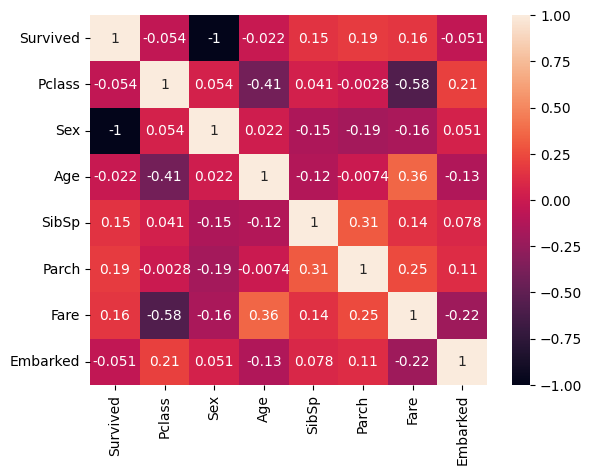

In [21]:
sns.heatmap(df_upsampled.corr(),annot = True)

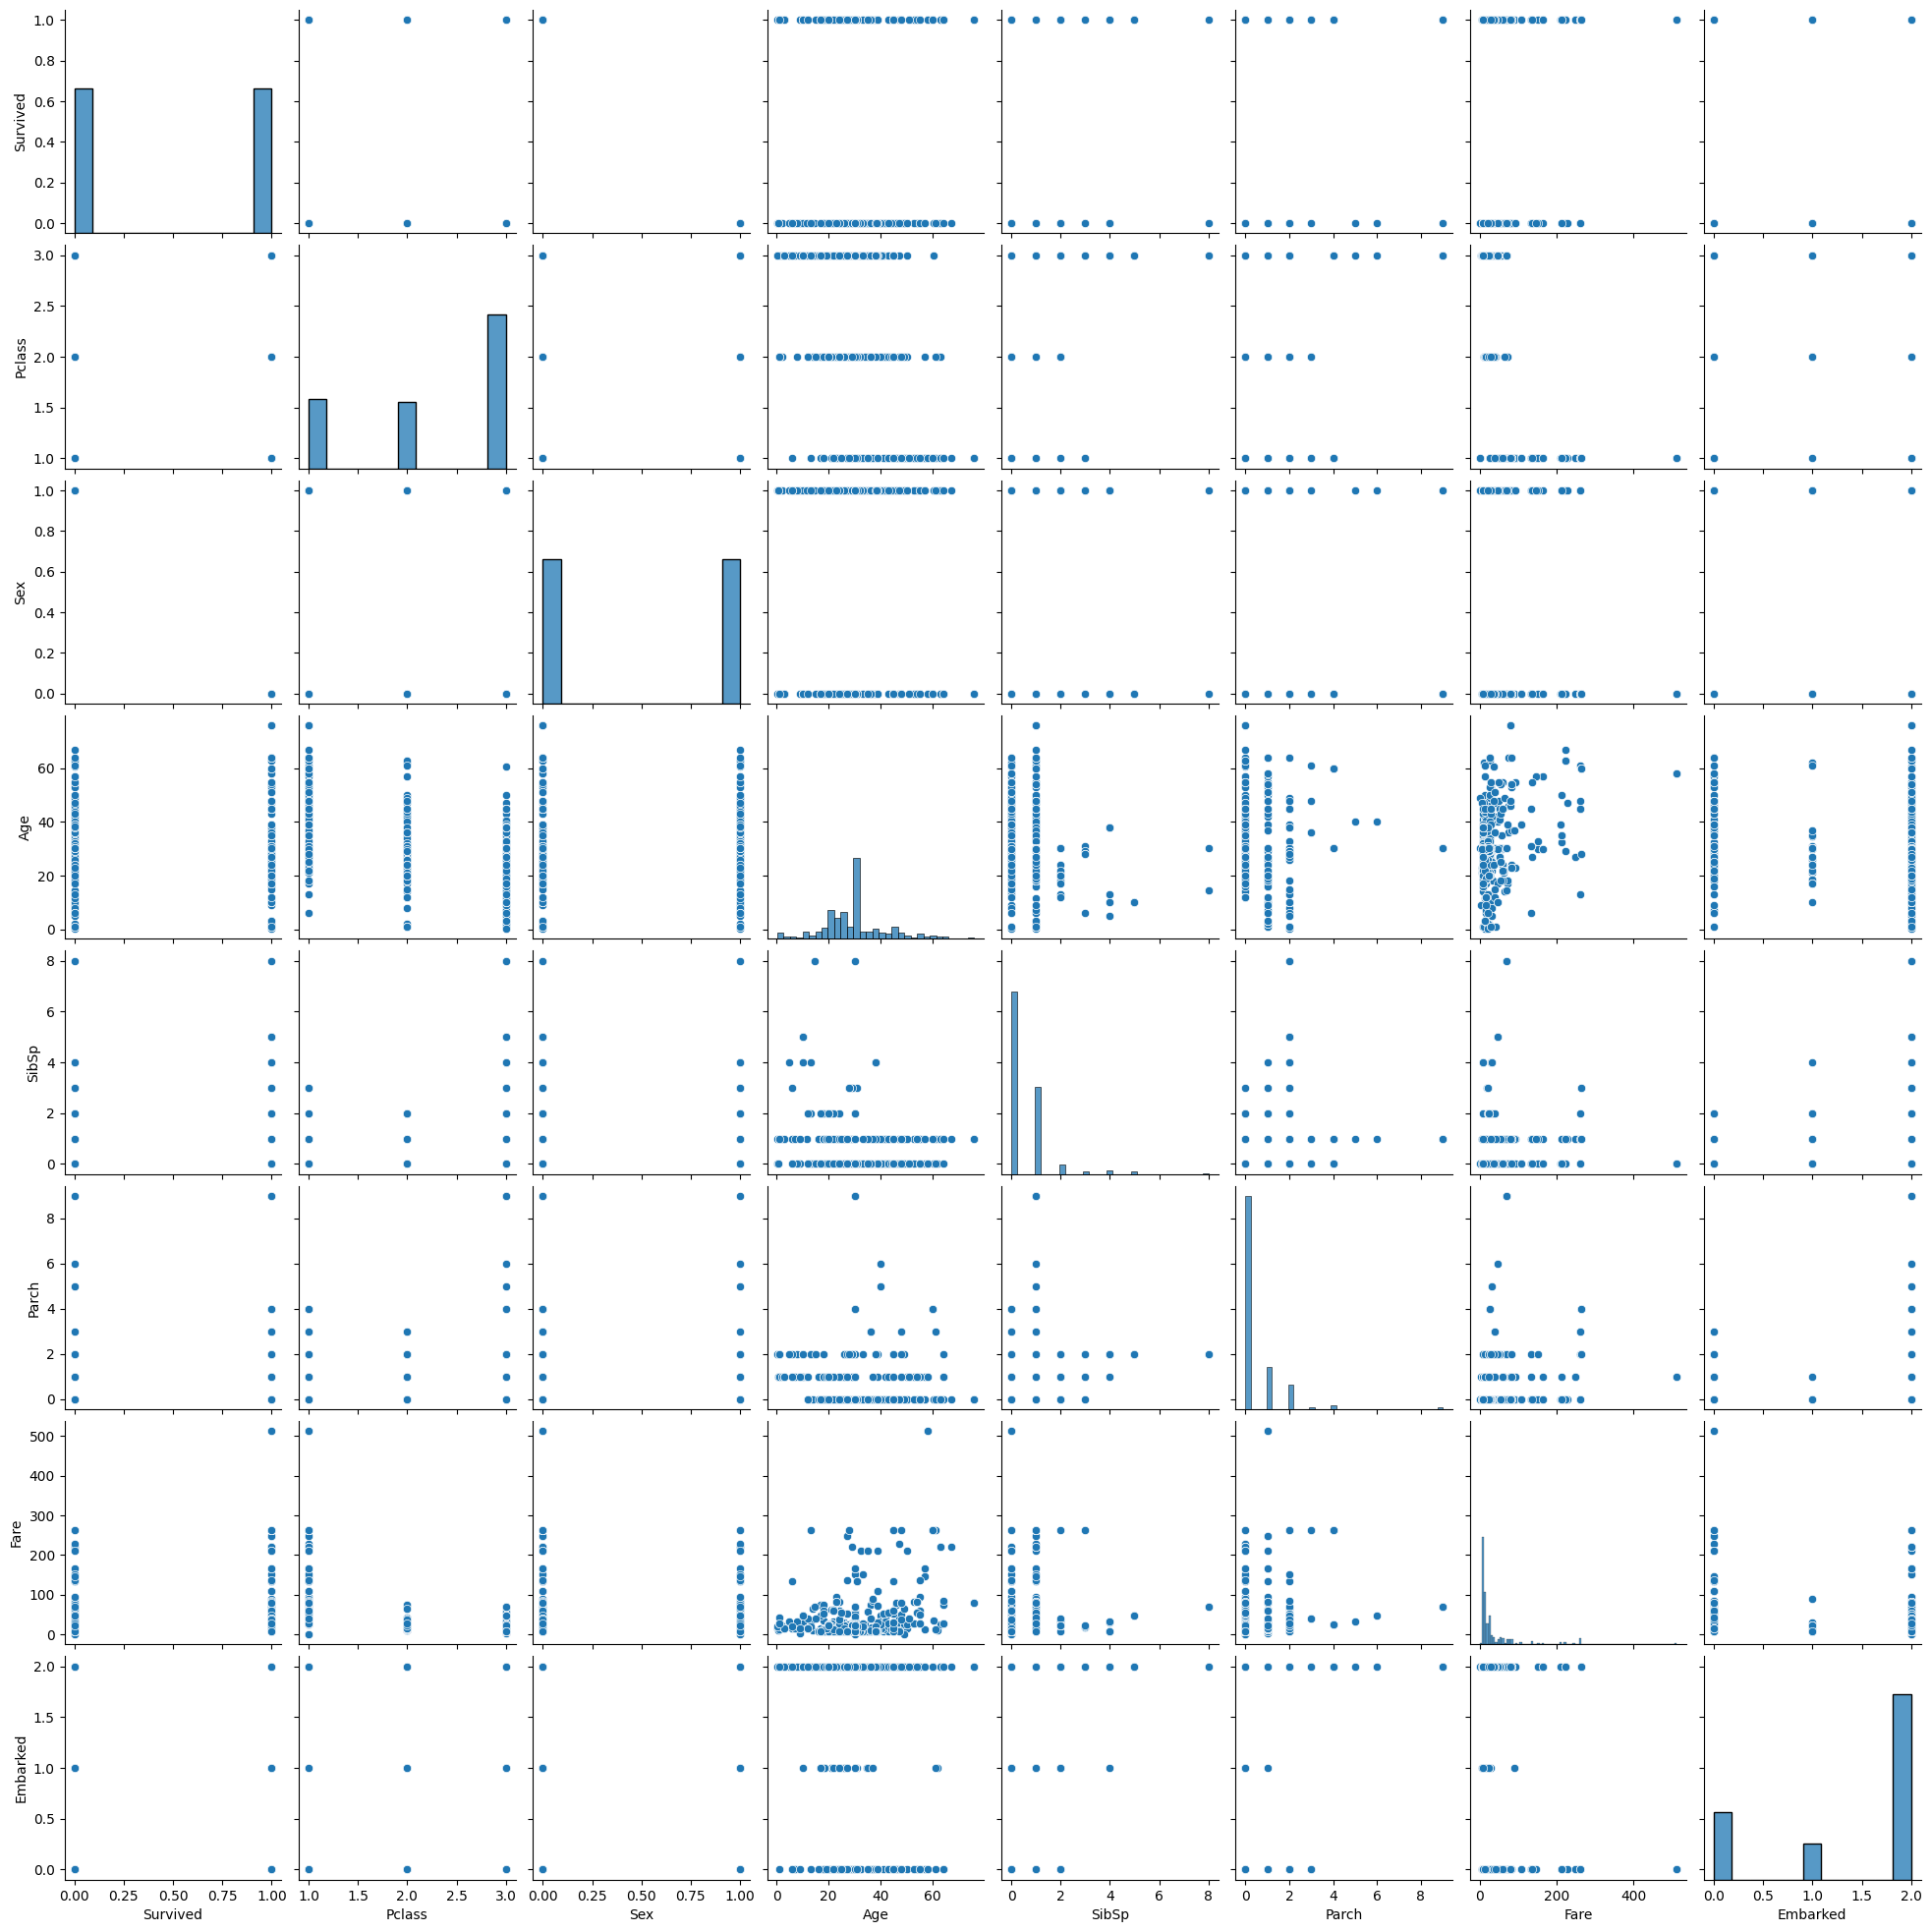

In [22]:
sns.pairplot(df_upsampled)

In [23]:
x = df.drop("Survived",axis = 1)
y= df["Survived"]

In [24]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [27]:
y_train_pred = model.predict(x_train)

In [28]:
from sklearn.metrics import mean_squared_error,r2_score


In [29]:
mse = mean_squared_error(y_train,y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train,y_train_pred)

In [30]:
print("mean squraed error for training data {}".format(mse))
print("root mean squraed error for training data {}".format(rmse))
print("r2 score for training data {}".format(r2))

mean squraed error for training data 0.0
root mean squraed error for training data 0.0
r2 score for training data 1.0


In [31]:
y_test_pred = model.predict(x_test)

In [32]:
mse = mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_test_pred)

In [38]:
print("mean squraed error for testing data {}".format(mse))
print("root mean squraed error for testing data {}".format(rmse))
print("r2 score for testing data {}".format(r2))

mean squraed error for testing data 0.0
root mean squraed error for testing data 0.0
r2 score for testing data 1.0


In [34]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

<Axes: >

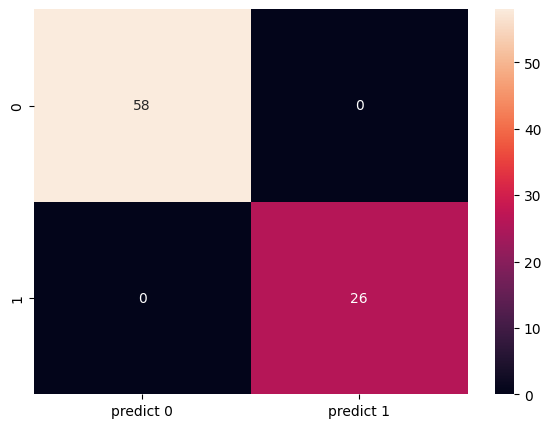

In [35]:
cm  = confusion_matrix(y_test,y_test_pred,labels = [0,1])
df_cm = pd.DataFrame(cm,index = [i for i in [0,1]] ,columns = [i for i in ["predict 0","predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot = True)

In [36]:
report = classification_report(y_test,y_test_pred,labels = [0,1])

In [37]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        26

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

